# GGI: building products from materials

### <font color="darkblue">Emily Joiner and Jordan Wingenroth</font>

###### <font color = "darkblue">March 6th, 2025</font>

## Thus far

1. We built our initial (v.0) prototype focused on interactivity, using [Shiny](https://shiny.posit.co/) for R

2. Jan and Brian provided feedback about functionalities required, including:

- Estimating GGI for a **facility** with unique fuel sources and production methods

- Data visualization, with an initial focus on stacked bar charts breaking down GGI categorically

- Cataloguing: printing a comprehensive list of the "ingredients" for a product/facility

3. We switched to using **Python** because its support for object-oriented programming (OOP) is well suited to the modular nature of this project

In [3]:
from product_types import *
from precal_classes import *
from data_visualization import *
from copy import deepcopy

## New features

### Two Python objects (each a `class` in programmer lingo)

- `Fuel`: an object that could be used to represent coal, natural gas, or other fossil fuels as currently described and parameterized in the *39 Sectors* report

- `Product`: an object that takes one or more `Fuel` objects as inputs, with a ratio term to quantify the amount of "fuel" required per unit "product"

## New features

### An example of a fuel

In [4]:
# Natural Gas

nat_gas = Fuel(name = "Natural Gas", carbon_frac = 0.763, processing = 0.258)

print(nat_gas)

'Natural Gas' fuel, carbon fraction = 0.763, processing emissions = 0.258, leakage = False


## New features

### An example of a product

In [5]:
# Liquified Natural Gas

lng = Product(name = "LNG", processing = 0)

lng.add_feedstock(nat_gas, unit_ratio = 1/.9)

print(lng)

'LNG' product, 1 input(s), processing emissions = 0


## New features

### An example of a method

A method is a function that operates on a class (`Fuel` or `Product`).

For example, calculating greenhouse gas intensity:

In [6]:
nat_gas_ggi = nat_gas.ggi_co2e()

round(nat_gas_ggi, 3) # rounds to 3 sig. fig.

3.056

This number matches the value from the Excel spreadsheet with the same parameterization.

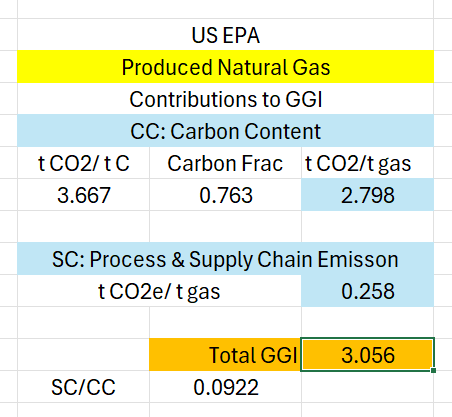

## New features

### An example of a method

A method is a function that operates on a class (`Fuel` or `Product`).

Calculating greenhouse gas intensity is possible for products too:

In [7]:
lng_ggi = lng.ggi_co2e()

round(lng_ggi, 3) # rounds to 3 sig. fig.

3.395

This number also matches the value from the Excel spreadsheet, although the spreadsheet value has rounding error due to copy-pasting.

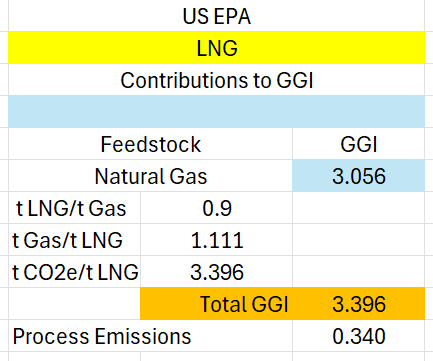

## New features

### Another method

We also built a basic method for addressing leakage for the fuel class:

In [8]:
nat_gas.set_leakage(leak_rate = 0.01, gwp = 30)

print(nat_gas)

leaky_ggi = nat_gas.ggi_co2e()

round(leaky_ggi, 3)

'Natural Gas' fuel, carbon fraction = 0.763, processing emissions = 0.258, leakage = True


3.356

This does not quite line up with the value in the latest iteration of the spreadsheet but it will be easy to fix once we get the math right.

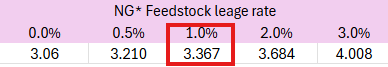

## New features 


### Precalibrated product and fuel classes

We showed the process of manually creating fuels and products using the `Fuel` and `Product` classes. We also have created precalibrated subclasses using the Excel sheet defaults. Users may call these subclasses directly.  

In [13]:
oil_sands = OilSands()
print("Default GHG intensity (CO2e) of", oil_sands.name, ":", round(oil_sands.ggi_co2e(),3))


Default GHG intensity (CO2e) of Canadian Oil Sands : 3.429


Precalibrated products can take both `Fuels` and other `Products` as inputs. Here coke, iron, oxygen, and limestone are all inputs to BOF steel. Coke is itself a product with coal as a feedstock. All of these precalibrated feedstocks are combined into the BOF steel product. 

In [20]:
coke = Coke(Coal())
bof_steel = BOFSteel(Iron(), coke, Oxygen(), Limestone(), processing = 0)
print("Default GHG intensity (CO2e) of", bof_steel.name, ":", bof_steel.ggi_co2e())

Default GHG intensity (CO2e) of BOF Steel : 3.0317


You can also view the catalog for BOF steel. 

In [21]:
bof_steel.catalog().show()

print(bof_steel)

'BOF Steel' product, 4 input(s), processing emissions = 0

'BOF Steel' product, 4 input(s), processing emissions = 0
